In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# import functions.py

import sys
import os
sys.path.append(os.path.abspath(".."))  # one level up
from functions import * 

In [12]:
# hyper-parameters

NUM_SAMPLES = 5000
NUM_REP = 30

k_list = [50, 100, 150, 200]
NUM_K = len(k_list)


def q2k(q):
    return int((1 - q) * NUM_SAMPLES)

def k2q(k):
    return 1 - k/NUM_SAMPLES



q_list = [k2q(k) for k in k_list]
NUM_Q = NUM_K


parameters1 = [0.1, 0.3, 0.5, 0.7, 0.9]
num_param1 = len(parameters1)


parameters2 = [2, 3, 4, 5, 6]
num_param2 = len(parameters2)


parameters3 = [0.1, 0.3, 0.5, 0.7, 0.9]
num_param3 = len(parameters3)


## Generate all the data need

### Dont run, if there is a file called "samples.npy"

In [13]:
### copula 1: C(u, v; t) = min(u, tv + (1-t)(u + v - 1)_{+})
parameters1 = [0.1, 0.3, 0.5, 0.7, 0.9]
num_param1 = len(parameters1)

samples1 = np.zeros([num_param1, NUM_REP, NUM_SAMPLES, 2])

for i in range(num_param1):
    param1 = parameters1[i]
    for j in range(NUM_REP):
        samples1[i, j] = sample_C_min(n=NUM_SAMPLES, t=param1)


In [14]:
### copula 2: max model
parameters2 = [2, 3, 4, 5, 6]
num_param2 = len(parameters2)

samples2 = np.zeros([num_param2, NUM_REP, NUM_SAMPLES, 2])

for i in range(num_param2):
    param2 = parameters2[i]
    for j in range(NUM_REP):
        samples2[i, j] = sample_max_model(n=NUM_SAMPLES, k=param2, rng=None)



In [15]:
### copula 3: asymmetrize gumbel alpha = 0.5 beta varying
parameters3 = [0.1, 0.3, 0.5, 0.7, 0.9]
num_param3 = len(parameters3)

samples3 = np.zeros([num_param3, NUM_REP, NUM_SAMPLES, 2])

for i in range(num_param3):
    print("{}/{}".format(i+1, num_param3))
    param3 = parameters3[i]
    for j in range(NUM_REP):
        c = asymmetrization(gumbel, 0.5, param3)
        samples3[i, j] = sampling(c, n=NUM_SAMPLES)

1/5
2/5
3/5
4/5
5/5


In [16]:
# save the samples, in case we dont need to generate everytime
with open("samples.npy", "wb") as f:
    np.save(f, samples1)
    np.save(f, samples2)
    np.save(f, samples3)



In [17]:

with open("samples.npy", "rb") as f:
    samples1 = np.load(f)
    samples2 = np.load(f)
    samples3 = np.load(f)




## Compute the three types of estimators

In [19]:
# results are in the form of num_param * NUM_REP * NUM_K

# tail tau
results1samples1 = np.zeros([num_param1, NUM_REP, NUM_K, 2])    # 2 is about X->Y, Y->X
for idx in range(num_param1):
    for jdx in range(NUM_REP):
        data = samples1[idx, jdx]
        for kdx in range(NUM_K):
            q = q_list[kdx]
            results1samples1[idx, jdx, kdx, 0] = asymmetric_tail_kendall_tau(data, q=q, direction='XtoY')
            results1samples1[idx, jdx, kdx, 1] = asymmetric_tail_kendall_tau(data, q=q, direction='YtoX')

results1samples2 = np.zeros([num_param2, NUM_REP, NUM_K, 2])    # 2 is about X->Y, Y->X
for idx in range(num_param2):
    for jdx in range(NUM_REP):
        data = samples2[idx, jdx]
        for kdx in range(NUM_K):
            q = q_list[kdx]
            results1samples2[idx, jdx, kdx, 0] = asymmetric_tail_kendall_tau(data, q=q, direction='XtoY')
            results1samples2[idx, jdx, kdx, 1] = asymmetric_tail_kendall_tau(data, q=q, direction='YtoX')

results1samples3 = np.zeros([num_param3, NUM_REP, NUM_K, 2])    # 2 is about X->Y, Y->X
for idx in range(num_param3):
    for jdx in range(NUM_REP):
        data = samples3[idx, jdx]
        for kdx in range(NUM_K):
            q = q_list[kdx]
            results1samples3[idx, jdx, kdx, 0] = asymmetric_tail_kendall_tau(data, q=q, direction='XtoY')
            results1samples3[idx, jdx, kdx, 1] = asymmetric_tail_kendall_tau(data, q=q, direction='YtoX')

In [20]:
# eta
results2samples1 = np.zeros([num_param1, NUM_REP, NUM_K, 2])    # 2 is about X->Y, Y->X
for idx in range(num_param1):
    for jdx in range(NUM_REP):
        data = samples1[idx, jdx]
        xs = data[:, 0]
        ys = data[:, 1]
        for kdx in range(NUM_K):
            k = k_list[kdx]
            results2samples1[idx, jdx, kdx, 0] = eta(xs, ys, k)   
            results2samples1[idx, jdx, kdx, 1] = eta(ys, xs, k)

results2samples2 = np.zeros([num_param2, NUM_REP, NUM_K, 2])    # 2 is about X->Y, Y->X
for idx in range(num_param2):
    for jdx in range(NUM_REP):
        data = samples2[idx, jdx]
        xs = data[:, 0]
        ys = data[:, 1]
        for kdx in range(NUM_K):
            k = k_list[kdx]
            results2samples2[idx, jdx, kdx, 0] = eta(xs, ys, k)   
            results2samples2[idx, jdx, kdx, 1] = eta(ys, xs, k)


results2samples3 = np.zeros([num_param3, NUM_REP, NUM_K, 2])    # 2 is about X->Y, Y->X
for idx in range(num_param3):
    for jdx in range(NUM_REP):
        data = samples3[idx, jdx]
        xs = data[:, 0]
        ys = data[:, 1]
        for kdx in range(NUM_K):
            k = k_list[kdx]
            results2samples3[idx, jdx, kdx, 0] = eta(xs, ys, k)   
            results2samples3[idx, jdx, kdx, 1] = eta(ys, xs, k)

In [22]:
# edm
def margin_transform(data):
    """
    Transform data with uniform margins (copula data) to CDF F(x) = 1 - 1/(x+1).

    Parameters:
    - data: np.ndarray, shape (n, d), assumed to have uniform[0,1] entries

    Returns:
    - transformed_data: np.ndarray, shape (n, d), with standard Pareto margins
    """
    epsilon = 1e-10
    data = np.clip(data, 0, 1 - epsilon)  # avoid division by zero
    return 1.0 / (1.0 - data) - 1.0



results3samples1 = np.zeros([num_param1, NUM_REP, NUM_K]) 
for idx in range(num_param1):
    for jdx in range(NUM_REP):
        data = samples1[idx, jdx]
        data =  margin_transform(data)   # to standard pareto margin
        for kdx in range(NUM_K):
            k = k_list[kdx]
            results3samples1[idx, jdx, kdx] = edm_estimator(data, k)


results3samples2 = np.zeros([num_param2, NUM_REP, NUM_K]) 
for idx in range(num_param2):
    for jdx in range(NUM_REP):
        data = samples2[idx, jdx]
        data =  margin_transform(data)   # to standard pareto margin
        for kdx in range(NUM_K):
            k = k_list[kdx]
            results3samples2[idx, jdx, kdx] = edm_estimator(data, k)


results3samples3 = np.zeros([num_param3, NUM_REP, NUM_K]) 
for idx in range(num_param3):
    for jdx in range(NUM_REP):
        data = samples3[idx, jdx]
        data =  margin_transform(data)   # to standard pareto margin
        for kdx in range(NUM_K):
            k = k_list[kdx]
            results3samples3[idx, jdx, kdx] = edm_estimator(data, k)


In [23]:
# save the data
with open("results.npy", "wb") as f:
    np.save(f, results1samples1)
    np.save(f, results1samples2)
    np.save(f, results1samples3)
    np.save(f, results2samples1)
    np.save(f, results2samples2)
    np.save(f, results2samples3)
    np.save(f, results3samples1)
    np.save(f, results3samples2)
    np.save(f, results3samples3)
    

In [24]:
with open("results.npy", "rb") as f:
    results1samples1 = np.load(f)
    results1samples2 = np.load(f)
    results1samples3 = np.load(f)
    results2samples1 = np.load(f)
    results2samples2 = np.load(f)
    results2samples3 = np.load(f)
    results3samples1 = np.load(f)
    results3samples2 = np.load(f)
    results3samples3 = np.load(f)

## Plot
### We are going to plot the estimators' value vs parameters in copulas' expression fix k or q


In [25]:
p = 0.025
z = norm.ppf(1 - p)


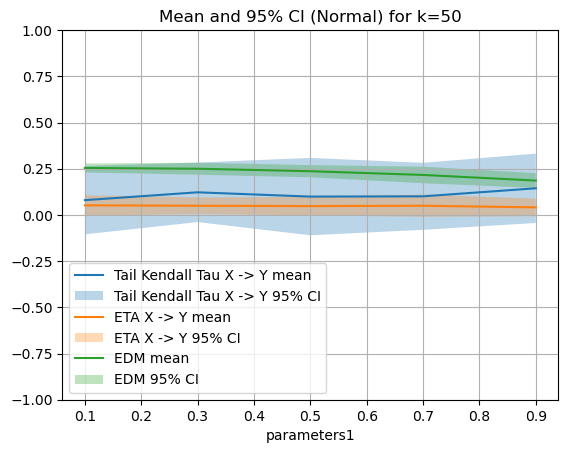

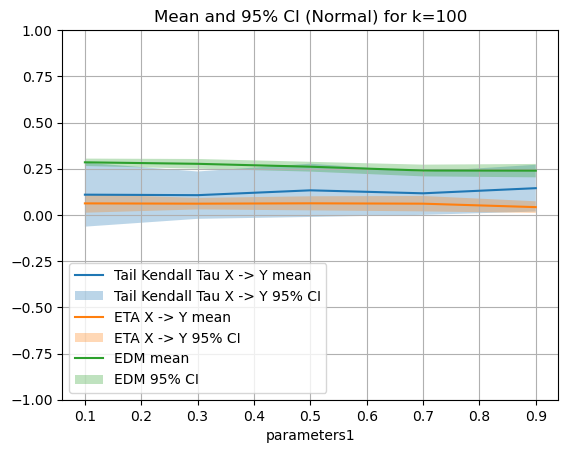

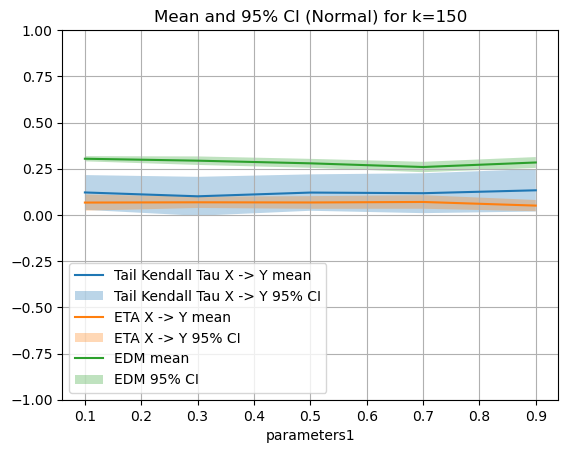

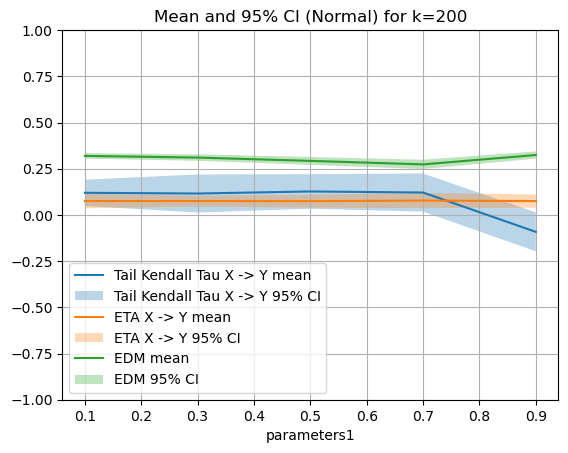

In [33]:
# For copula 1
results_samples1_list = [results1samples1[:, :, :, 0], results2samples1[:, :, :, 0], results3samples1[:, :, :]]
labels = ['Tail Kendall Tau X -> Y', 'ETA X -> Y', 'EDM']

for k in range(NUM_K):
    plt.figure()
    for result, label in zip(results_samples1_list, labels):
        means = result[:, :, k].mean(axis=1)
        std_err = result[:, :, k].std(axis=1, ddof=1) 
        ci = z * std_err
        plt.plot(parameters1, means, label=f'{label} mean')
        plt.fill_between(parameters1, means - ci, means + ci, alpha=0.3, label=f'{label} 95% CI')
        plt.ylim(-1.0, 1.0)

    plt.xlabel('parameters1')
    # plt.ylabel(f'Result k={k_list[k]}')
    plt.title(f'Mean and 95% CI (Normal) for k={k_list[k]}')
    plt.legend()
    plt.grid(True)




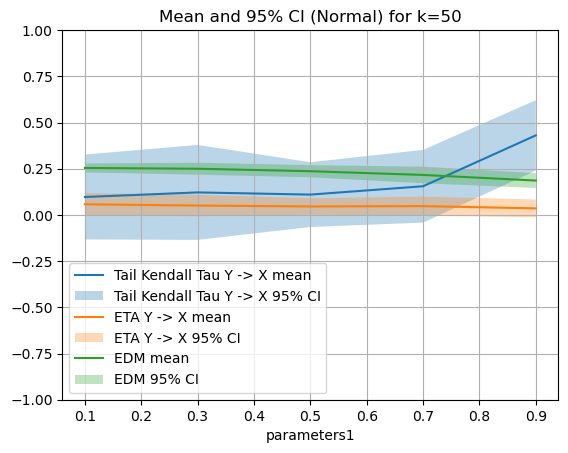

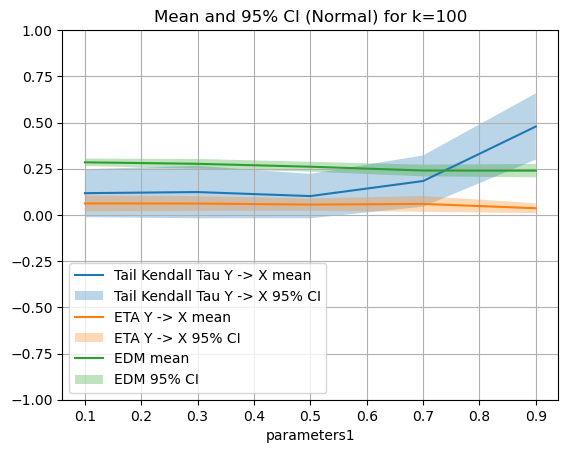

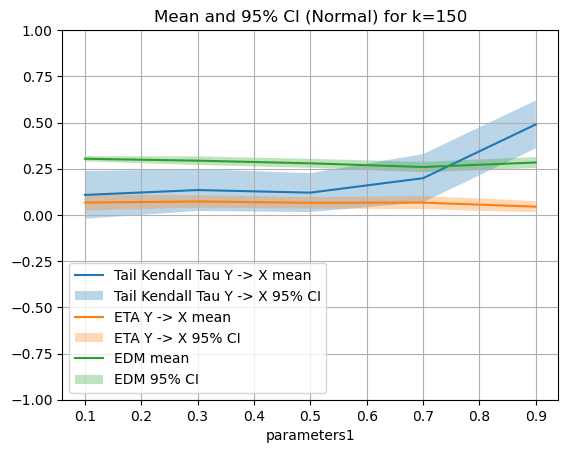

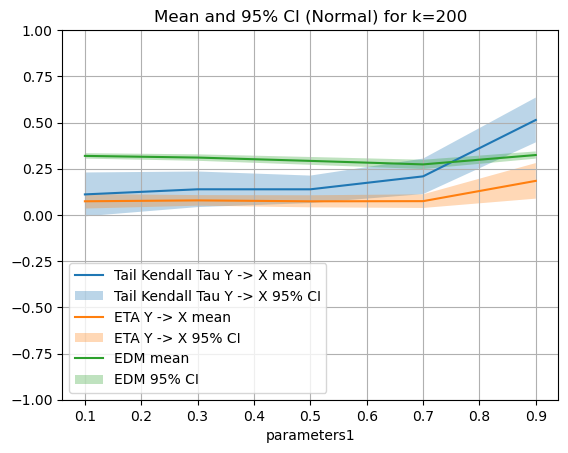

In [34]:
# For copula 1
results_samples1_list = [results1samples1[:, :, :, 1], results2samples1[:, :, :, 1], results3samples1[:, :, :]]
labels = ['Tail Kendall Tau Y -> X', 'ETA Y -> X', 'EDM']

for k in range(NUM_K):
    plt.figure()
    for result, label in zip(results_samples1_list, labels):
        means = result[:, :, k].mean(axis=1)
        std_err = result[:, :, k].std(axis=1, ddof=1) 
        ci = z * std_err
        plt.plot(parameters1, means, label=f'{label} mean')
        plt.fill_between(parameters1, means - ci, means + ci, alpha=0.3, label=f'{label} 95% CI')
        plt.ylim(-1.0, 1.0)

    plt.xlabel('parameters1')
   #  plt.ylabel(f'Result k={k_list[k]}')
    plt.title(f'Mean and 95% CI (Normal) for k={k_list[k]}')
    plt.legend()
    plt.grid(True)


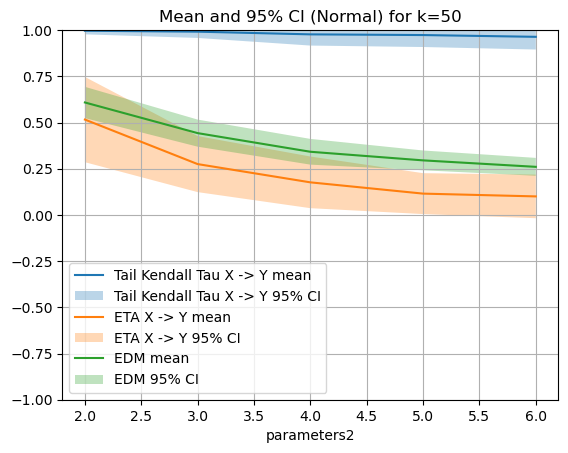

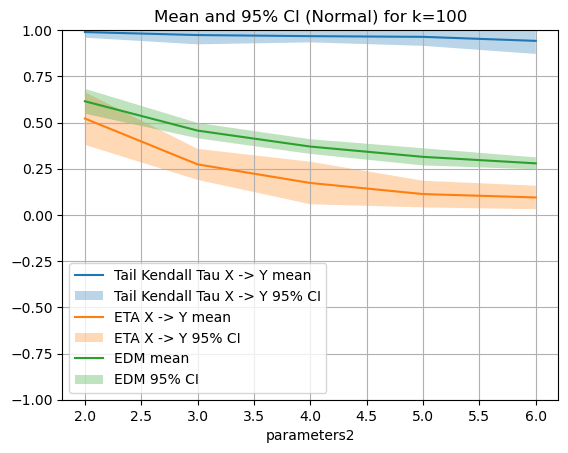

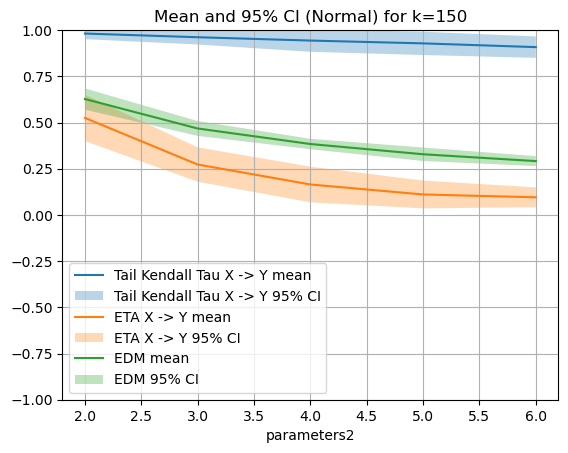

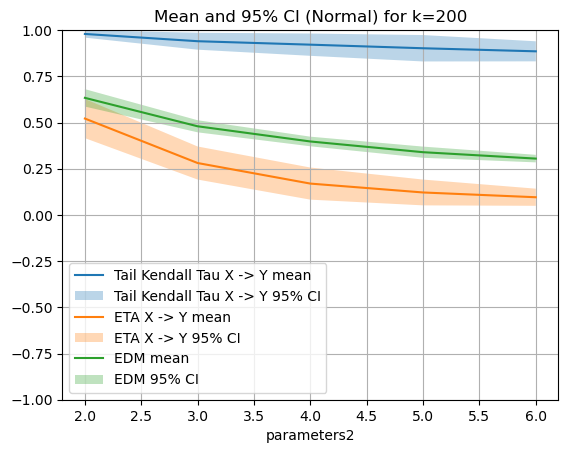

In [35]:
# copula 2 
results_samples2_list = [results1samples2[:, :, :, 0], results2samples2[:, :, :, 0], results3samples2[:, :, :]]
labels = ['Tail Kendall Tau X -> Y', 'ETA X -> Y', 'EDM']

for k in range(NUM_K):
    plt.figure()
    for result, label in zip(results_samples2_list, labels):
        means = result[:, :, k].mean(axis=1)
        std_err = result[:, :, k].std(axis=1, ddof=1) 
        ci = z * std_err
        plt.plot(parameters2, means, label=f'{label} mean')
        plt.fill_between(parameters2, means - ci, means + ci, alpha=0.3, label=f'{label} 95% CI')
        plt.ylim(-1.0, 1.0)

    plt.xlabel('parameters2')
    # plt.ylabel(f'Result k={k_list[k]}')
    plt.title(f'Mean and 95% CI (Normal) for k={k_list[k]}')
    plt.legend()
    plt.grid(True)

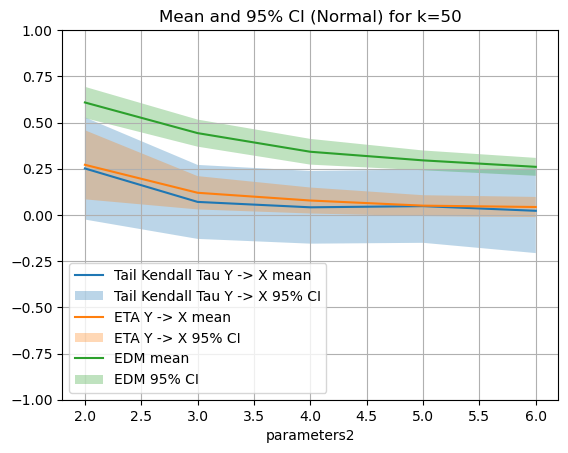

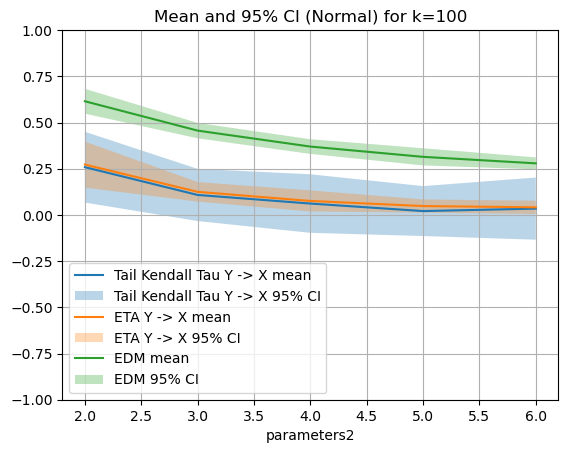

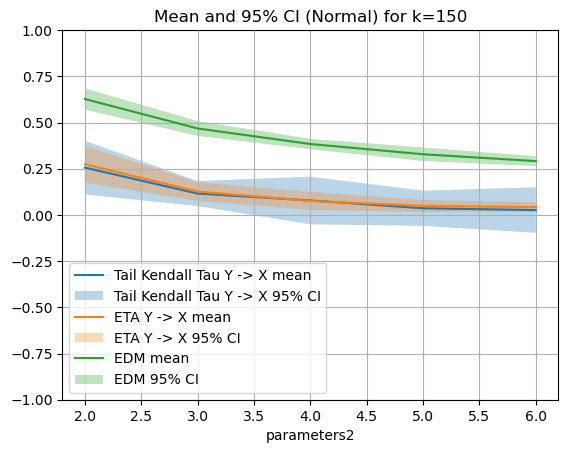

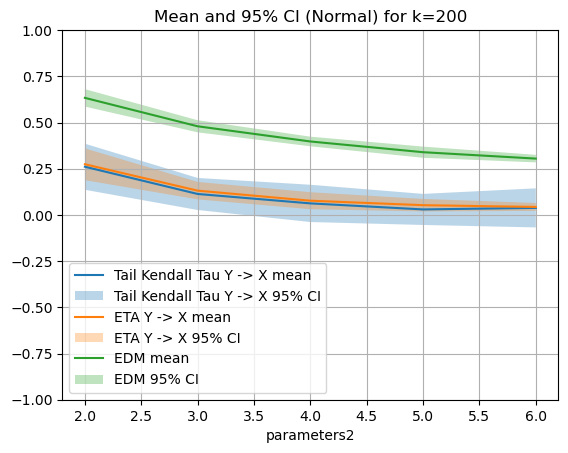

In [36]:
# copula 2 
results_samples2_list = [results1samples2[:, :, :, 1], results2samples2[:, :, :, 1], results3samples2[:, :, :]]
labels = ['Tail Kendall Tau Y -> X', 'ETA Y -> X', 'EDM']

for k in range(NUM_K):
    plt.figure()
    for result, label in zip(results_samples2_list, labels):
        means = result[:, :, k].mean(axis=1)
        std_err = result[:, :, k].std(axis=1, ddof=1) 
        ci = z * std_err
        plt.plot(parameters2, means, label=f'{label} mean')
        plt.fill_between(parameters2, means - ci, means + ci, alpha=0.3, label=f'{label} 95% CI')
        plt.ylim(-1.0, 1.0)

    plt.xlabel('parameters2')
    # plt.ylabel(f'Result k={k_list[k]}')
    plt.title(f'Mean and 95% CI (Normal) for k={k_list[k]}')
    plt.legend()
    plt.grid(True)

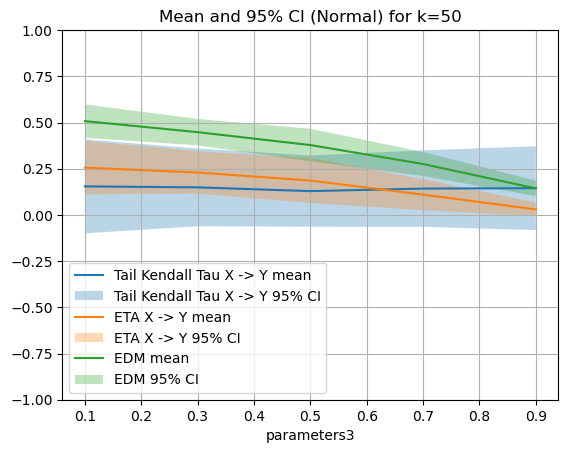

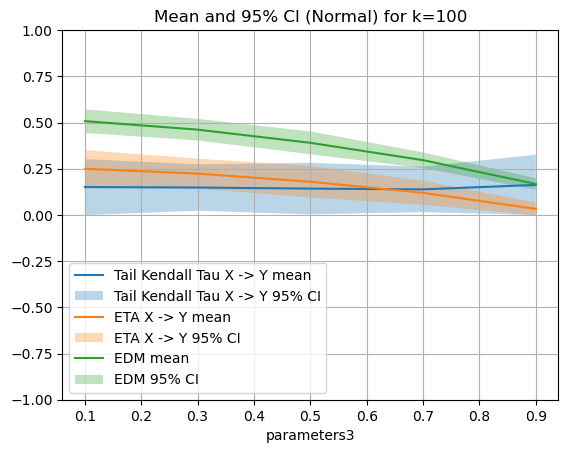

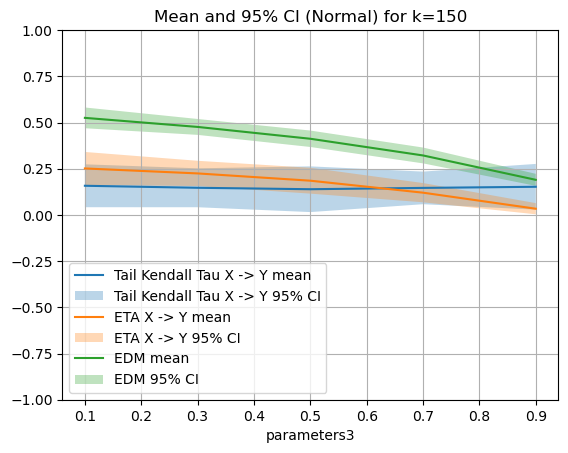

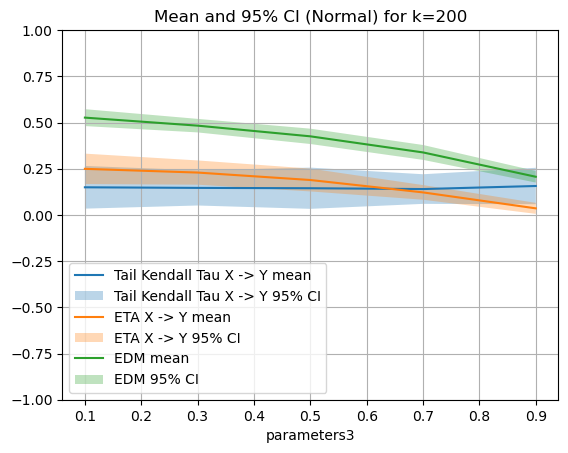

In [37]:
# copula 3
results_samples3_list = [results1samples3[:, :, :, 0], results2samples3[:, :, :, 0], results3samples3[:, :, :]]
labels = ['Tail Kendall Tau X -> Y', 'ETA X -> Y', 'EDM']

for k in range(NUM_K):
    plt.figure()
    for result, label in zip(results_samples3_list, labels):
        means = result[:, :, k].mean(axis=1)
        std_err = result[:, :, k].std(axis=1, ddof=1) 
        ci = z * std_err
        plt.plot(parameters3, means, label=f'{label} mean')
        plt.fill_between(parameters3, means - ci, means + ci, alpha=0.3, label=f'{label} 95% CI')
        plt.ylim(-1.0, 1.0)

    plt.xlabel('parameters3')
    # plt.ylabel(f'Result k={k_list[k]}')
    plt.title(f'Mean and 95% CI (Normal) for k={k_list[k]}')
    plt.legend()
    plt.grid(True)

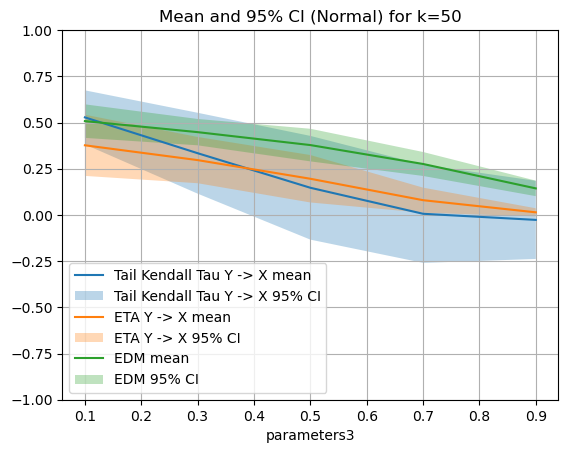

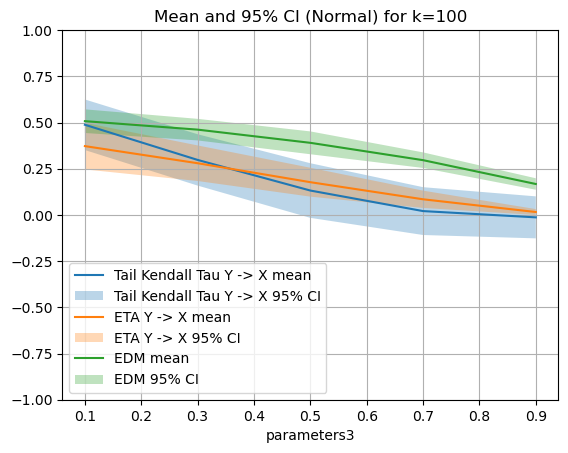

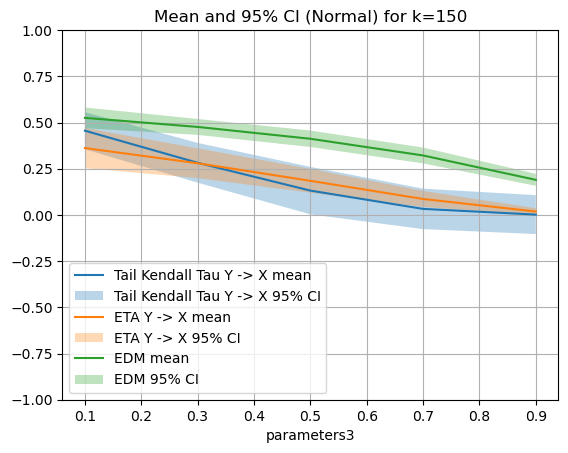

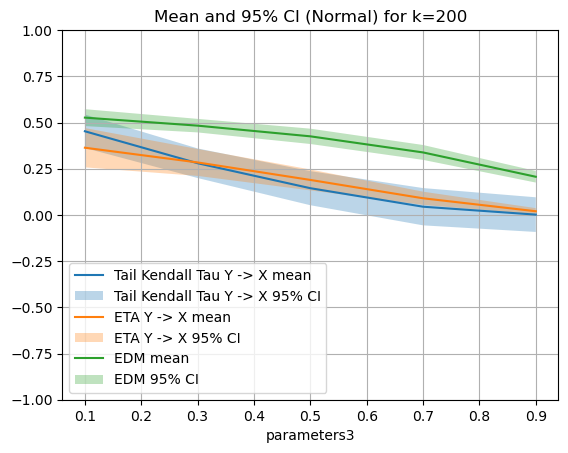

In [38]:
# copula 3
results_samples3_list = [results1samples3[:, :, :, 1], results2samples3[:, :, :, 1], results3samples3[:, :, :]]
labels = ['Tail Kendall Tau Y -> X', 'ETA Y -> X', 'EDM']

for k in range(NUM_K):
    plt.figure()
    for result, label in zip(results_samples3_list, labels):
        means = result[:, :, k].mean(axis=1)
        std_err = result[:, :, k].std(axis=1, ddof=1) 
        ci = z * std_err
        plt.plot(parameters3, means, label=f'{label} mean')
        plt.fill_between(parameters3, means - ci, means + ci, alpha=0.3, label=f'{label} 95% CI')
        plt.ylim(-1.0, 1.0)

    plt.xlabel('parameters3')
    # plt.ylabel(f'Result k={k_list[k]}')
    plt.title(f'Mean and 95% CI (Normal) for k={k_list[k]}')
    plt.legend()
    plt.grid(True)